In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, precision_recall_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro, kstest, normaltest, boxcox
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore


import warnings
warnings.filterwarnings('ignore')


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro, kstest, normaltest, boxcox
import statsmodels.api as sm




In [2]:
df = pd.read_csv(r"C:\Users\suyas\velocity_sushant_15\EXCEL FILES\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [7]:

df['mainroad'].replace({'yes':1,'no': 0},inplace = True)

In [8]:
df["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [9]:

df['guestroom'].replace({'yes':1,'no': 0},inplace = True)

In [10]:
df["basement"].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [11]:

df['basement'].replace({'yes':1,'no': 0},inplace = True)

In [12]:
df["hotwaterheating"].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [14]:

df['hotwaterheating'].replace({'yes':1,'no': 0},inplace = True)

In [15]:
df["airconditioning"].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [16]:

df['airconditioning'].replace({'yes':1,'no': 0},inplace = True)

In [17]:
df["bedrooms"].value_counts().to_dict()

{3: 300, 2: 136, 4: 95, 5: 10, 6: 2, 1: 2}

In [18]:

df['bedrooms'].replace({"3": 3, "2": 2, "4": 4, "5": 5, "6": 6, "1": 1},inplace = True)

In [19]:
df["prefarea"].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [20]:

df['prefarea'].replace({'yes':1,'no': 0},inplace = True)

In [21]:
df["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [22]:

df['furnishingstatus'].replace({'semi-furnished':1,'unfurnished': 0, 'furnished':2},inplace = True)

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


<AxesSubplot: xlabel='area'>

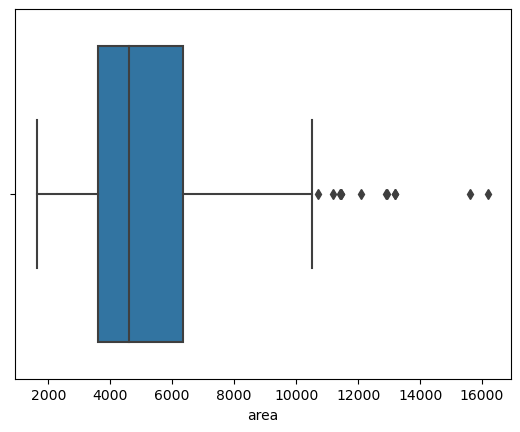

In [24]:
sns.boxplot(x = df["area"])

<AxesSubplot: >

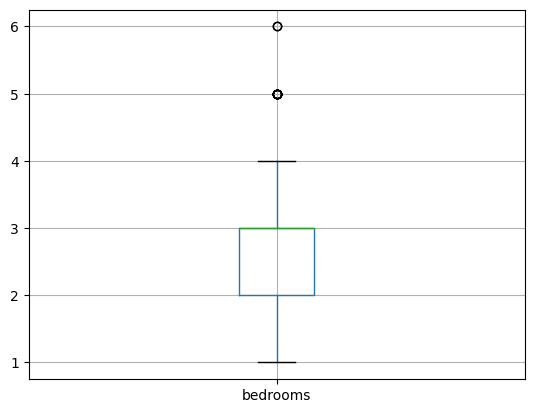

In [25]:
df[["bedrooms"]].boxplot()

In [26]:
df["stories"].value_counts().to_dict()

{2: 238, 1: 227, 4: 41, 3: 39}

In [27]:

df['stories'].replace({"2": 2, "1": 1,"4": 4, "3": 3},inplace = True)

In [28]:
df["bathrooms"].value_counts().to_dict()

{1: 401, 2: 133, 3: 10, 4: 1}

In [29]:

df['bathrooms'].replace({"2": 2, "1": 1,"4": 4, "3": 3},inplace = True)

In [30]:
df["parking"].value_counts().to_dict()

{0: 299, 1: 126, 2: 108, 3: 12}

In [31]:

df['parking'].replace({"2": 2, "1": 1,"0": 0, "3": 3},inplace = True)

In [32]:
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
print(lower_tail)
print(upper_tail)

-540.0
10500.0


In [33]:
df.loc[df["area"] > upper_tail]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,2
56,7343000,11440,4,1,2,1,0,1,0,0,1,1,1
64,7000000,11175,3,1,1,1,0,1,0,1,1,1,2
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,2
69,6790000,12090,4,2,2,1,0,0,0,0,2,1,2
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
129,5873000,11460,3,1,3,1,0,0,0,0,2,1,1
186,5110000,11410,2,1,2,1,0,0,0,0,0,1,2
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1


<AxesSubplot: xlabel='area'>

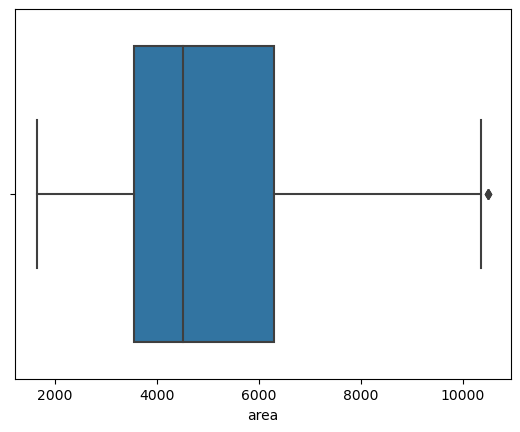

In [34]:
new_df = df.loc[df['area'] <= upper_tail]
sns.boxplot(x =new_df['area'])

<AxesSubplot: xlabel='area'>

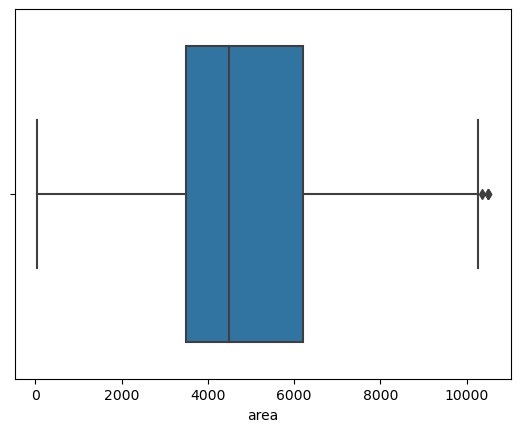

In [35]:
df['area'] = np.where(df['area'] > upper_tail, 50, df['area'])
sns.boxplot(x = df['area'])

In [ ]:
FEATURE SELECTION

In [36]:
df.cov()
# check linearity

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,3.498544e+12,1.655040e+09,505946.425931,486409.333378,682644.632825,193607.540576,182974.748111,167084.951632,36453.619131,394111.230505,619467.324204,261721.518922,433954.322450
area,1.655040e+09,3.890569e+06,176.119482,209.669823,203.442512,179.154688,146.624437,37.571435,-15.573428,239.317755,548.894030,152.135665,181.788596
bedrooms,5.059464e+05,1.761195e+02,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,0.069256
bathrooms,4.864093e+05,2.096698e+02,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,0.054921
stories,6.826446e+05,2.034425e+02,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,0.069135
mainroad,1.936075e+05,1.791547e+02,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,0.041601
guestroom,1.829747e+05,1.466244e+02,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,0.034491
basement,1.670850e+05,3.757143e+01,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,0.041025
hotwaterheating,3.645362e+04,-1.557343e+01,0.007117,0.007066,0.003424,-0.000860,-0.000826,0.000438,0.043848,-0.012665,0.012244,-0.005279,0.005042
airconditioning,3.941112e+05,2.393178e+02,0.055140,0.043689,0.118480,0.017097,0.024609,0.010517,-0.012665,0.216392,0.063795,0.023169,0.053295


In [37]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.448599,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.448599,1.000000,0.120978,0.211553,0.118897,0.260526,0.194166,0.039887,-0.037705,0.260824,0.322986,0.181781,0.121049
bedrooms,0.366494,0.120978,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.211553,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.118897,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.260526,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.194166,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.039887,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.037705,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.260824,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


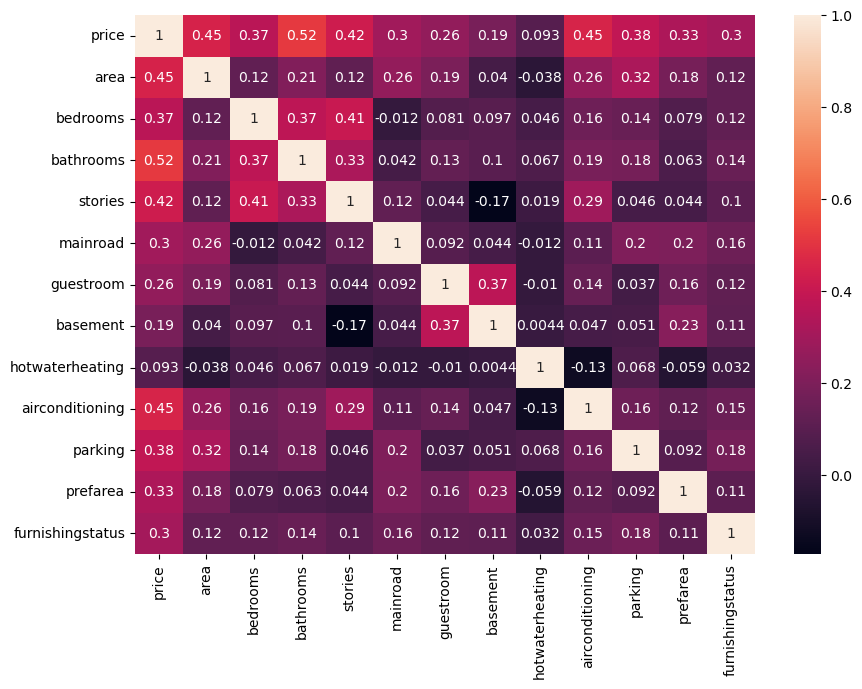

In [38]:
# check through Heatmap
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.savefig("Correlation.png")

In [39]:
correlation = df.corr().tail(1)
correlation


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
furnishingstatus,0.304721,0.121049,0.123244,0.143559,0.104672,0.156726,0.118328,0.112831,0.031628,0.150477,0.177539,0.107686,1.0


In [40]:
df.shape[1]

13

In [41]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [42]:
# Detect Multicolinearity
vif_list = []
for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)
    print(f"VIF for {df.columns[i]} : {vif}")

VIF for price : 20.933953987645268
VIF for area : 8.917078139958347
VIF for bedrooms : 15.211006849142777
VIF for bathrooms : 11.060008628198062
VIF for stories : 8.397403365067825
VIF for mainroad : 7.039513548825525
VIF for guestroom : 1.4992429180591258
VIF for basement : 2.049461366878949
VIF for hotwaterheating : 1.1202812078724254
VIF for airconditioning : 1.9623847832890715
VIF for parking : 2.0584056601571996
VIF for prefarea : 1.5772679852709954


In [43]:
x = df.drop("price", axis=1)
y = df["price"]
s1_m = pd.Series(vif_list, index =x.columns)
s1_m.sort_values()

airconditioning      1.120281
basement             1.499243
furnishingstatus     1.577268
parking              1.962385
hotwaterheating      2.049461
prefarea             2.058406
guestroom            7.039514
mainroad             8.397403
bedrooms             8.917078
stories             11.060009
bathrooms           15.211007
area                20.933954
dtype: float64

<AxesSubplot: >

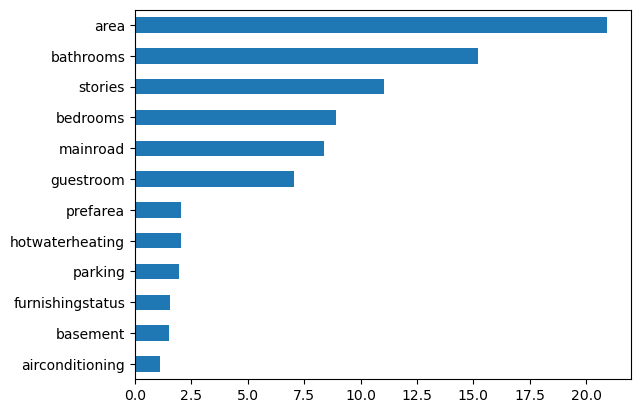

In [44]:
s1_m.sort_values().plot(kind="barh")


<AxesSubplot: >

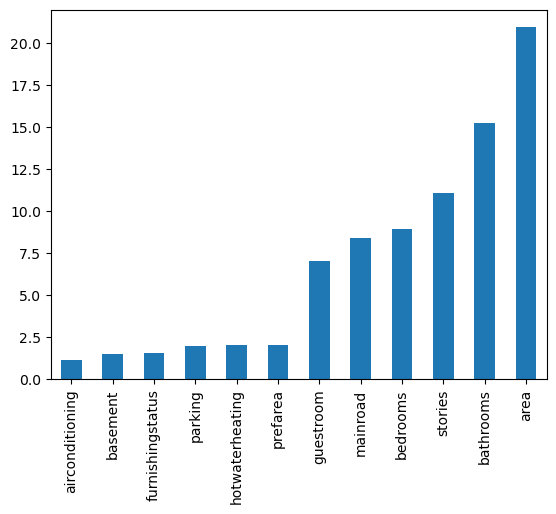

In [45]:
s1_m.sort_values().plot(kind="bar")

In [ ]:
MODEL_TRAINING:

In [47]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [48]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
443,4320,3,1,1,0,0,0,0,0,1,0,0
323,5400,3,1,1,1,0,0,0,0,3,0,1
157,2817,4,2,2,0,1,1,0,0,1,0,2
231,4320,3,1,1,1,0,0,0,0,0,1,1
351,3600,2,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
369,3600,2,1,1,1,0,0,0,0,0,0,2
320,4320,3,1,2,1,0,0,0,0,2,1,2
527,1836,2,1,1,0,0,1,0,0,0,0,1
125,50,3,1,1,1,0,0,0,1,2,0,1


In [50]:
y_train

443    3220000
323    4025000
157    5495000
231    4690000
351    3780000
        ...   
369    3675000
320    4060000
527    2275000
125    5943000
265    4403000
Name: price, Length: 436, dtype: int64

In [51]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
443,4320,3,1,1,0,0,0,0,0,1,0,0
323,5400,3,1,1,1,0,0,0,0,3,0,1
157,2817,4,2,2,0,1,1,0,0,1,0,2
231,4320,3,1,1,1,0,0,0,0,0,1,1
351,3600,2,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
369,3600,2,1,1,1,0,0,0,0,0,0,2
320,4320,3,1,2,1,0,0,0,0,2,1,2
527,1836,2,1,1,0,0,1,0,0,0,0,1
125,50,3,1,1,1,0,0,0,1,2,0,1


In [52]:
x_test


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
482,3150,3,1,2,0,0,0,0,0,0,0,0
314,4040,2,1,2,1,0,0,0,0,1,0,1
383,4500,4,2,2,1,0,1,0,0,2,0,2
487,5400,4,1,2,1,0,0,0,0,0,0,0
43,6000,4,2,4,1,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98,6600,3,2,3,1,0,0,0,1,0,1,0
307,4080,3,1,2,1,0,0,0,0,2,0,1
399,7350,2,1,1,1,0,0,0,0,1,0,1
214,4350,2,1,1,1,0,1,0,0,0,0,0


In [53]:
y_test

482    2940000
314    4095000
383    3570000
487    2870000
43     7700000
        ...   
98     6293000
307    4165000
399    3500000
214    4865000
173    5250000
Name: price, Length: 109, dtype: int64

In [54]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [55]:
linear_reg.coef_

array([1.82240454e+02, 1.77816283e+05, 8.28564657e+05, 4.21541292e+05,
       4.87875927e+05, 2.34825312e+05, 4.23223343e+05, 9.17625827e+05,
       9.82928734e+05, 3.88913065e+05, 8.94983305e+05, 2.81833646e+05])

In [56]:
linear_reg.intercept_

-137157.28481673636

In [ ]:
EVALUATION

In [57]:
# for Training data
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE : ",mse)

rmse = np.sqrt(mse)
print("RMSE : ",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE : ",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 squared : ",r2)

MSE :  1311859158218.3489
RMSE :  1145364.2033075544
MAE :  846460.5337727915
R2 squared :  0.6409918804418256


In [58]:
r2_squred = linear_reg.score(x_train, y_train)
print("R2 squared : ",r2_squred)

R2 squared :  0.6409918804418256


In [59]:
# for Testing data
y_pred_test = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE : ",mse)

rmse = np.sqrt(mse)
print("RMSE : ",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE : ",mae)

r2 = r2_score(y_test, y_pred_test)
print("R2 squared : ",r2)

MSE :  1108808915269.9246
RMSE :  1052999.9597672948
MAE :  789175.232599789
R2 squared :  0.6056418775965917


In [60]:
r2_squred = linear_reg.score(x_test, y_test)
print("R2 squared : ",r2_squred)

R2 squared :  0.6056418775965917


In [61]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [ ]:
HYPERPARAMETER TUNING:
    1.  RIDGE MODEL 

In [63]:
ridge_reg_model = Ridge()

hyperparameters = {"alpha" : np.arange(0.01, 5, 0.01)}
gscv_ridge_model = GridSearchCV(ridge_reg_model, hyperparameters, cv = 5)
gscv_ridge_model.fit(x_train, y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=4.49)

In [67]:
ridge_reg_model = Ridge(alpha = 0.85)
ridge_reg_model.fit(x_train, y_train)

Ridge(alpha=0.85)

In [68]:
y_pred_train_ridge = ridge_reg_model.predict(x_train)

mse_train = mean_squared_error(y_train, y_pred_train_ridge)
print("Mean Squared Error (Train):-", mse_train)

mae_train = mean_absolute_error(y_train, y_pred_train_ridge)
print("Mean Absolute Error (Train):-", mae_train)

rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error (Train):-", rmse_train)

r2_squared_train = r2_score(y_train, y_pred_train_ridge)
print('R2 squared Error (Train):-', r2_squared_train)

Mean Squared Error (Train):- 1311974288519.053
Mean Absolute Error (Train):- 845688.8375628052
Root Mean Squared Error (Train):- 1145414.4614588437
R2 squared Error (Train):- 0.6409603734675433


In [69]:
y_pred_test_ridge = ridge_reg_model.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred_test_ridge)
print("Mean Squared Error (Test):-", mse_test)

mae_test = mean_absolute_error(y_test, y_pred_test_ridge)
print("Mean Absolute Error (Test):-", mae_test)

rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (Test):-", rmse_test)

r2_squared_test = r2_score(y_test, y_pred_test_ridge)
print('R2 squared Error (Test):-', r2_squared_test)

Mean Squared Error (Test):- 1106622197656.8015
Mean Absolute Error (Test):- 786893.1937373244
Root Mean Squared Error (Test):- 1051961.1198408436
R2 squared Error (Test):- 0.6064196038939382


In [70]:
lasso_reg_model = Lasso(alpha = 4.99)
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=4.99)

In [71]:
y_pred_train_lasso = lasso_reg_model.predict(x_train)

mse_train = mean_squared_error(y_train, y_pred_train_lasso)
print("Mean Squared Error (Train):-", mse_train)

mae_train = mean_absolute_error(y_train, y_pred_train_lasso)
print("Mean Absolute Error (Train):-", mae_train)

rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error (Train):-", rmse_train)

r2_squared_train = r2_score(y_train, y_pred_train_lasso)
print('R2 squared Error (Train):-', r2_squared_train)



print("##############TESTING DATA EVALUATION #########")



y_pred_test_lasso = lasso_reg_model.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred_test_lasso)
print("Mean Squared Error (Test):-", mse_test)

mae_test = mean_absolute_error(y_test, y_pred_test_lasso)
print("Mean Absolute Error (Test):-", mae_test)

rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (Test):-", rmse_test)

r2_squared_test = r2_score(y_test, y_pred_test_lasso)
print('R2 squared Error (Test):-', r2_squared_test)

Mean Squared Error (Train):- 1311859159370.0923
Mean Absolute Error (Train):- 846457.1239245448
Root Mean Squared Error (Train):- 1145364.2038103393
R2 squared Error (Train):- 0.6409918801266354
##############TESTING DATA EVALUATION #########
Mean Squared Error (Test):- 1108801235845.17
Mean Absolute Error (Test):- 789167.8998009199
Root Mean Squared Error (Test):- 1052996.313310341
R2 squared Error (Test):- 0.6056446088548686


In [72]:
y_pred_train_lasso = lasso_reg_model.predict(x_train)

mse_train = mean_squared_error(y_train, y_pred_train_lasso)
print("Mean Squared Error (Train):-", mse_train)

mae_train = mean_absolute_error(y_train, y_pred_train_lasso)
print("Mean Absolute Error (Train):-", mae_train)

rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error (Train):-", rmse_train)

r2_squared_train = r2_score(y_train, y_pred_train_lasso)
print('R2 squared Error (Train):-', r2_squared_train)



print("##############TESTING DATA EVALUATION #########")



y_pred_test_lasso = lasso_reg_model.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred_test_lasso)
print("Mean Squared Error (Test):-", mse_test)

mae_test = mean_absolute_error(y_test, y_pred_test_lasso)
print("Mean Absolute Error (Test):-", mae_test)

rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (Test):-", rmse_test)

r2_squared_test = r2_score(y_test, y_pred_test_lasso)
print('R2 squared Error (Test):-', r2_squared_test)

Mean Squared Error (Train):- 1311859159370.0923
Mean Absolute Error (Train):- 846457.1239245448
Root Mean Squared Error (Train):- 1145364.2038103393
R2 squared Error (Train):- 0.6409918801266354
##############TESTING DATA EVALUATION #########
Mean Squared Error (Test):- 1108801235845.17
Mean Absolute Error (Test):- 789167.8998009199
Root Mean Squared Error (Test):- 1052996.313310341
R2 squared Error (Test):- 0.6056446088548686


In [ ]:
kdeplot of training data

In [73]:
ridge_train_residual = y_train - y_pred_train_ridge
ridge_train_residual

443    3.846008e+05
323   -5.521275e+05
157    2.851100e+05
231    5.957262e+05
351    8.814685e+05
           ...     
369    4.930473e+05
320   -1.520703e+06
527   -2.425336e+05
125    1.766422e+06
265    1.495086e+05
Name: price, Length: 436, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Density'>

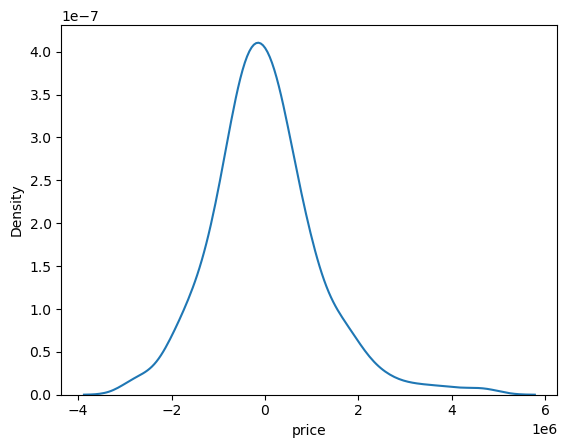

In [74]:
sns.kdeplot(ridge_train_residual)

In [75]:
ridge_test_residual = y_test - y_pred_test_ridge
ridge_test_residual

482    2.856807e+05
314    3.025741e+05
383   -2.584264e+06
487   -8.565391e+05
43     1.130418e+06
           ...     
98    -5.766297e+05
307   -2.035327e+05
399   -4.762265e+05
214    1.689187e+06
173   -7.133933e+05
Name: price, Length: 109, dtype: float64

In [ ]:
 HYPOTHESIS TESTING

In [ ]:
1. SHAPIRO TEST

In [76]:
stats, p_val = shapiro(ridge_train_residual)  # On training data residual
print("P_value of Training data residual: ", p_val)

P_value of Training data residual:  7.247503486240703e-09


In [77]:
stats, p_val = shapiro(ridge_test_residual)  # On testing data residual
print("P_value of Testing data residual: ", p_val)

P_value of Testing data residual:  1.1205415830772836e-06


In [ ]:
2. KSTEST

In [78]:
stats, p_val = kstest(ridge_train_residual, 'norm')  # On training data residual
print("P_value of Training data residual: ", p_val)

P_value of Training data residual:  1.0382120813932224e-114


In [79]:
stats, p_val = kstest(ridge_test_residual, 'norm')  # On testing data residual
print("P_value of Testing data residual: ", p_val)

P_value of Testing data residual:  3.8169630007363565e-40


In [ ]:
3. NORMALTEST

In [80]:
stats, p_val = normaltest(ridge_train_residual)  # On training data residual
print("P_value of Training data residual: ", p_val)

P_value of Training data residual:  5.752426060128017e-13


In [81]:
stats, p_val = normaltest(ridge_test_residual)  # On testing data residual
print("P_value of Testing data residual: ", p_val)

P_value of Testing data residual:  1.0679790173966224e-12


In [ ]:
3. QUANTILE -QUANTILE PLOT

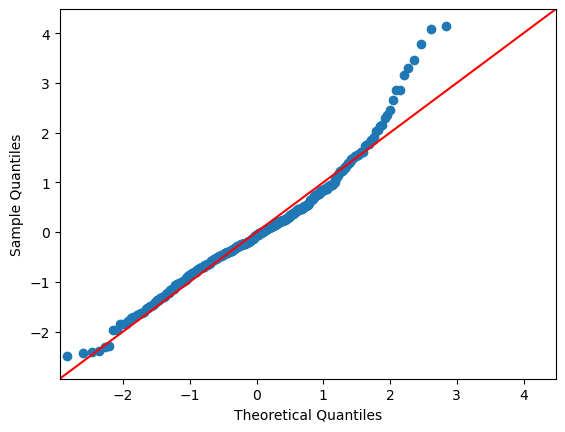

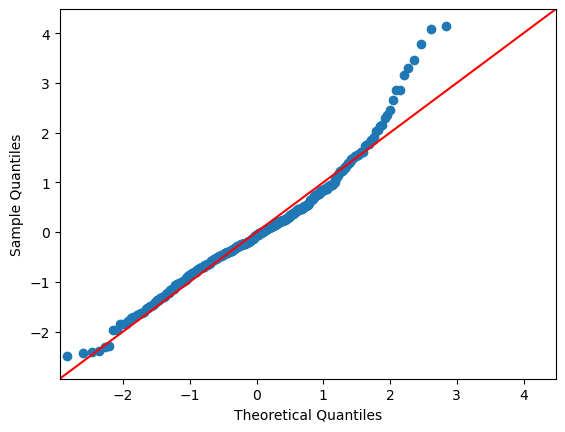

In [82]:
sm.qqplot(ridge_train_residual, line= '45', fit = True)

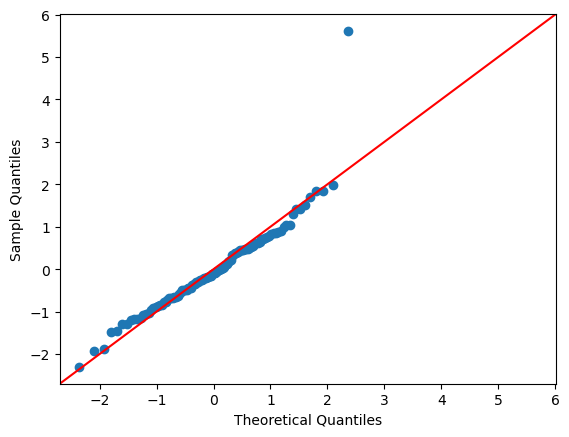

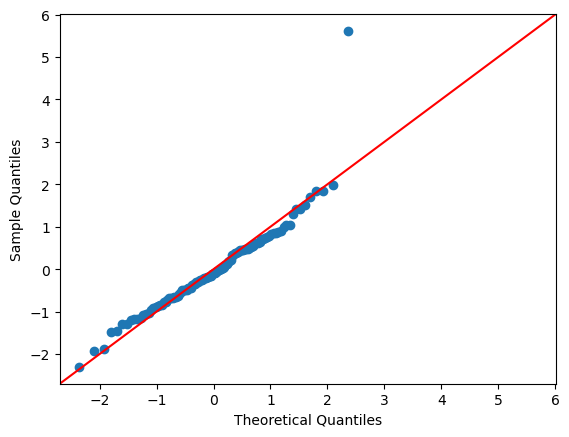

In [83]:
sm.qqplot(ridge_test_residual, line= '45', fit = True)

In [ ]:
4) SKEWNESS OF RESIDUAL

In [84]:
ridge_train_residual.skew()

0.7436359876221571

In [85]:
ridge_test_residual.skew()

1.5748002966347594

In [ ]:
4) HOMOSCEDASTICITY

<AxesSubplot: xlabel='price', ylabel='price'>

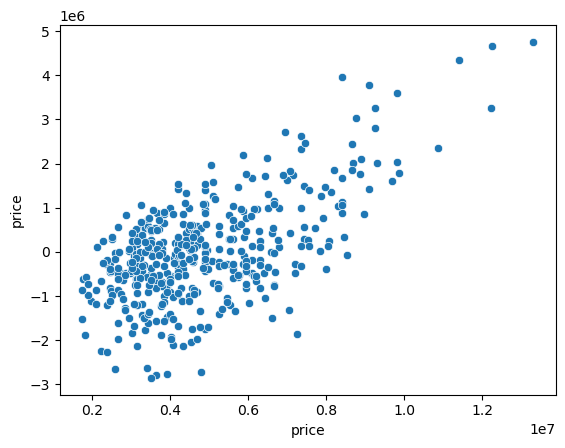

In [86]:
sns.scatterplot(x= y_train, y= ridge_train_residual) # of Training data

<AxesSubplot: xlabel='price', ylabel='price'>

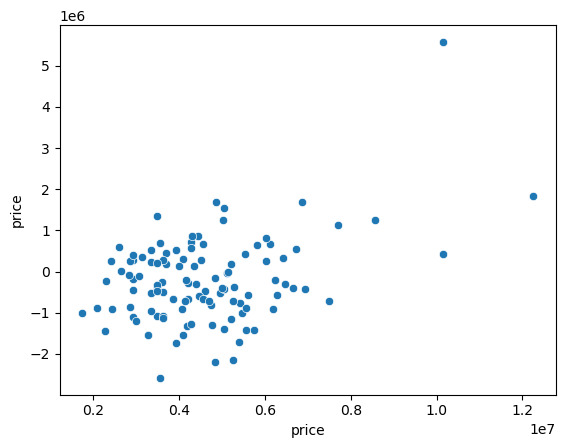

In [87]:
sns.scatterplot(x= y_test, y= ridge_test_residual) # of Training data

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [89]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [90]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [91]:
project_data = {'bedrooms':{"3": 3, "2": 2, "4": 4, "5": 5, "6": 6, "1": 1},
               'bathrooms':{"2": 2, "1": 1,"4": 4, "3": 3},
                'stories':{"2": 2, "1": 1,"4": 4, "3": 3},
                'mainroad':{'yes':1,'no': 0},
                'guestroom':{'yes':1,'no': 0},
                'basement':{'yes':1,'no': 0},
                'hotwaterheating':{'yes':1,'no': 0},
                'airconditioning':{'yes':1,'no': 0},
               'parking':{'fwd': 1, 'rwd': 0, '4wd': 2},
                'prefarea':{'yes':1,'no': 0},
               'furnishingstatus':{'semi-furnished':1,'unfurnished': 0, 'furnished':2},
            'Columns':x.columns.tolist()}

In [92]:
area = 7420
bedrooms = 4
bathrooms = 2
stories =3
mainroad = 1
guestroom = 0
basement = 0
hotwaterheating = 0
airconditioning = 0
parking = 1
furnishingstatus = 2
prefarea = 1





test_array = np.zeros(x.shape[1])
test_array[0] = area 
test_array[1] = bedrooms 
test_array[2] = bathrooms 
test_array[3] = stories 
test_array[4] = mainroad
test_array[5] = guestroom
test_array[6] = basement 
test_array[7] = hotwaterheating
test_array[8] = airconditioning  
test_array[9] = parking 
test_array[10] = prefarea
test_array[11] = furnishingstatus


# bedrooms = 4
# bathrooms = 2
# stories =3
# parking = 2
# furnishingstatus = 2
# area = 7420

# test_array = np.zeros(x.shape[1])
# test_array[0] = bedrooms
# test_array[1] = bathrooms
# test_array[2] = stories
# test_array[3] = parking
# test_array[4] = furnishingstatus
# test_array[5] = area



test_array
predicted_price = np.around(lasso_reg_model.predict([test_array]), 3)[0]
print("predicted  price is :", predicted_price)

predicted  price is : 7183529.693


In [93]:
import pickle
import json

with open('lasso_reg_model.pkl','wb') as f:
    pickle.dump(lasso_reg_model,f)

In [94]:
with open('project_data.json', 'w') as f:
    json.dump(project_data, f)